In [4]:
import pandas as pd

In [6]:
a=pd.read_csv('/content/data.csv')
a

In [10]:
matrix=a.drop(columns=['Unnamed: 0'])

In [9]:
q=pd.read_csv('/content/labels.csv')


Neural Network Autoencoder

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler

In [13]:
x_train = matrix.to_numpy()

# Scale data to have zero mean and unit variance
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [62]:


input_dim = 20531

# This is the dimension of the latent space (encoding space)
latent_dim = 2

encoder = Sequential([
    Dense(512, activation='relu', input_shape=(input_dim,)),
                Dense(128, activation='relu'),

            Dense(45, activation='relu'),

        Dense(30, activation='relu'),
    Dense(16, activation='relu'),

    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim,)),
        Dense(32, activation='relu'),
                Dense(16, activation='relu'),


    Dense(8, activation='relu'),
    Dense(4, activation='relu'),

    Dense(input_dim, activation=None)
])

In [63]:
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer='adam')


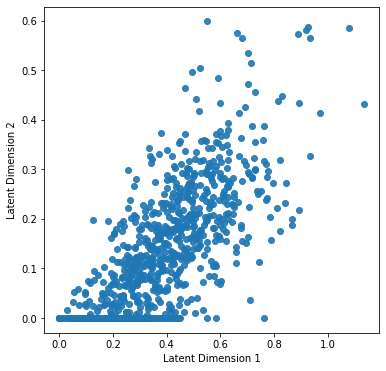

In [64]:
encoded_x_train = encoder(x_train)
plt.figure(figsize=(6,6))
plt.scatter(encoded_x_train[:, 0], encoded_x_train[:, 1], alpha=0.9)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2');

In [65]:
import plotly.express as px

pd.options.plotting.backend = "plotly"
figplotly1 = px.scatter(encoded_x_train[:,0], y=encoded_x_train[:,1],color=q['Class'])
figplotly1.show()
#st.plotly_chart(figplotly1, use_container_width=True)

FastICA

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



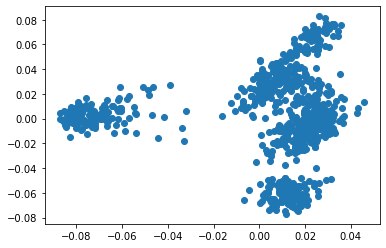

In [30]:
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

transformer = FastICA(n_components=2, random_state=0)
X_transformedica = transformer.fit_transform(matrix)

plot = plt.scatter(X_transformedica[:,0], X_transformedica[:,1])

In [32]:
pd.options.plotting.backend = "plotly"
figplotly1 = px.scatter(X_transformedica[:,0], y=X_transformedica[:,1],color=q['Class'])
figplotly1.show()
#st.plotly_chart(figplotly1, use_container_width=True)

Heatmap and Hierarchical Clustering 

In [59]:
from scipy.spatial import distance
import numpy as np
import pandas as pd

In [60]:
#chebyshev
dchebyshev=distance.cdist(matrix,matrix, metric='chebyshev')
dmatchebyshev=pd.DataFrame(dchebyshev)
dmatchebyshev

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
0,0.000000,18.525161,15.187181,12.697918,18.525161,14.032597,18.525161,15.261695,18.525161,14.509033,...,18.525161,18.525161,17.029057,13.311552,18.525161,16.913422,18.525161,16.690883,11.957593,15.053989
1,18.525161,0.000000,16.053597,18.371794,14.975920,17.398084,13.609213,17.604560,13.365755,17.853785,...,17.699911,13.638405,14.042010,18.308437,11.198613,14.728378,16.378149,14.920600,18.166516,16.864488
2,15.187181,16.053597,0.000000,14.335778,16.053597,13.184920,16.053597,14.465097,16.053597,12.817895,...,17.699911,16.053597,14.766151,13.356347,16.935913,14.441858,17.566350,15.508445,14.641256,14.766151
3,12.697918,18.371794,14.335778,0.000000,18.371794,13.245616,18.371794,14.826813,18.371794,13.442071,...,18.371794,18.371794,16.875689,12.237771,18.371794,16.760055,18.371794,14.465586,11.839863,12.512213
4,18.525161,14.975920,16.053597,18.371794,0.000000,17.398084,14.975920,17.604560,14.623613,17.853785,...,12.090407,12.263539,11.228144,18.308437,14.975920,14.478997,17.544859,14.975920,18.166516,16.864488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,16.913422,14.728378,14.441858,16.760055,14.478997,15.786345,12.869591,15.992822,13.610252,16.242046,...,17.202989,12.038863,13.176091,16.696698,15.612016,0.000000,18.640513,14.349009,16.554777,15.252749
797,18.525161,16.378149,17.566350,18.371794,17.544859,17.746219,18.640513,18.640513,18.288207,17.916300,...,17.699911,18.640513,18.192458,18.308437,12.944943,18.640513,0.000000,17.315415,18.166516,18.640513
798,16.690883,14.920600,15.508445,14.465586,14.975920,14.543032,14.543032,14.461091,15.508445,14.543032,...,17.699911,14.902893,15.508445,14.537388,14.286918,14.349009,17.315415,0.000000,13.557630,13.298964
799,11.957593,18.166516,14.641256,11.839863,18.166516,10.624189,18.166516,14.199454,18.166516,13.393943,...,18.166516,18.166516,16.670412,14.058231,18.166516,16.554777,18.166516,13.557630,0.000000,16.649719


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:625: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



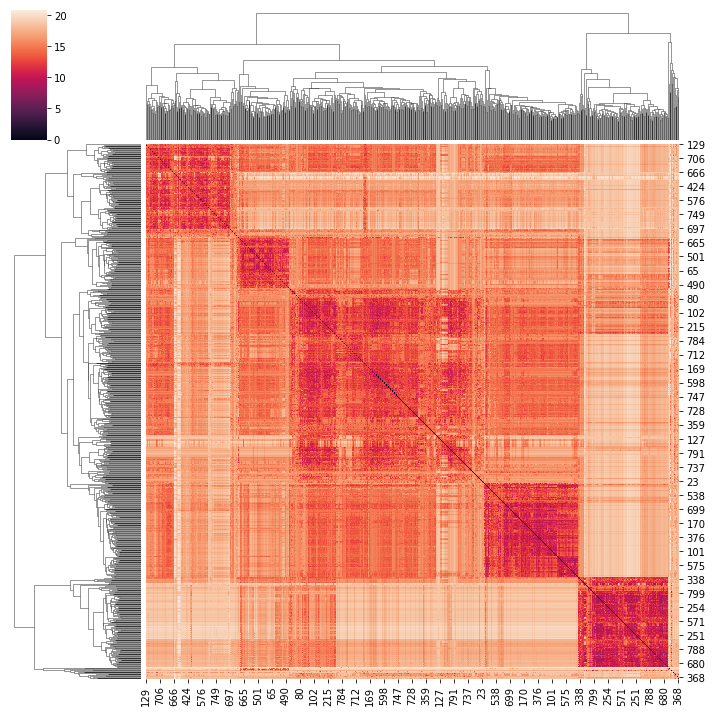

In [61]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 

# Default plot
sns.clustermap(dmatchebyshev)

# Show the graph
plt.show()

Umap

In [33]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 31.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=77e6dd3c8b7ed2250adc24b0db478c7d803249c73e7ed6a7cf7060431bcb12b9
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=52e7ef81b9857c64f77df257daa69ac6f8efc8d62293f42d99874ce8c15745bd
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [51]:
#Umap plot
import umap
n_neighbors=50
min_dist=0.01
n_components=2
metric='euclidean'
fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
uvalues = fit.fit_transform(matrix)

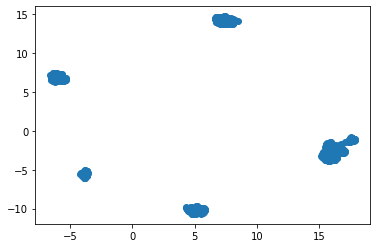

In [54]:
ploot = plt.scatter(uvalues[:,0], uvalues[:,1])

In [57]:
pd.options.plotting.backend = "plotly"
figplotly5 = px.scatter(x=uvalues[:,0], y=uvalues[:,1],color=q['Class'])
figplotly5.show()
#st.plotly_chart(figplotly1, use_container_width=True)